In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# phénomène de Gibbs

On considère la fonction $2\pi$ périodique $f$ , définie par :

 $$f(x)=\left\lbrace
\begin{array}{ll}
-1&\text{si }x\in]-\pi,\, 0[
\\
0&\text{si }x=0
\\
1&
\text{si }x \in ]0,\,\pi]
\end{array}\right.$$

et on considère la somme partielle d'ordre $n$ de sa série de Fourier $S_n(f)(x)=\sum_{k=-n}^n c_k(f)e^{ikx}=\sum_{k=1}^n sin(kx) \frac{(1-(-1)^k)^2}{k\pi}$, où $c_k(f)$ sont les coefficients de Fourier de $f$.

On veut illustrer graphiquement l'évolution de $S_n(f)$ en traçant $S_n(f)$ pour des valeurs de $n$ de plus en plus grandes. 

In [ ]:
#La fonction f
def f(x):
  if x > -(np.pi) and x < 0:
    return -1
  elif x==0:
    return 0
  else:
    return 1

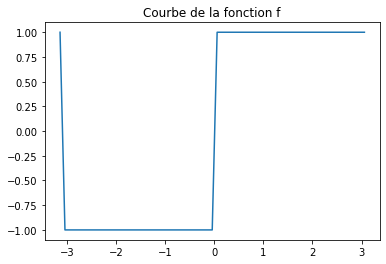

In [ ]:
#tracer la courbe de f dans l'interval [-pi, pi]
val_x=np.arange(-np.pi, np.pi, 1/10)

val_f=[f(x) for x in val_x]

plt.title("Courbe de la fonction f")
plt.plot(val_x, val_f)

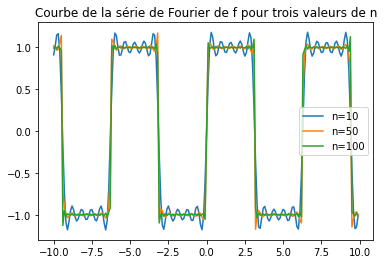

In [ ]:
#la somme snf
def snf(n, x):
  som=0
  for k in range(1, n+1):
    som=som+np.sin(k*x)*(1-(-1)**k)*2/(np.pi*k)
  return som 

#interval des valeurs prises par x
val_x=np.arange(-10, 10, 1/10)

#liste des valeurs prises par snf pour un n fixé et x dans val_x
def n_fixe(n):
  val_snf=[snf(n, x) for x in val_x]
  return val_snf

val_snf1=n_fixe(10)
val_snf2=n_fixe(50)
val_snf3=n_fixe(100)

#tracer 
p = plt.plot(val_x, val_snf1, val_x, val_snf2, val_x, val_snf3) 
plt.title('Courbe de la série de Fourier de f pour trois valeurs de n')
plt.legend((p[0], p[1], p[2]), ('n=10', 'n=50', 'n=100'))
plt.show()

Le phénomène de Gibbs est, en quelque sorte, un « défaut d'approximation » pour une fonction continue de classe C1 par morceaux. Pour une telle fonction f, le théorème de Dirichlet assure que la série de Fourier de f converge simplement vers la fonction f sur l'intervalle où f est C1 par morceaux. En tout point x de continuité, la somme de la série de Fourier est f(x).

Le polynôme trigonométrique SN(f), N-ième somme partielle de la série de Fourier, est une fonction continue ; il est donc normal qu'il ne puisse approcher uniformément la fonction au voisinage des points de discontinuité. Inversement, sur un segment sur lequel f est dérivable, on observe une convergence uniforme, conformément au théorème de Weierstrass trigonométrique (c'est le cas des zones de « plateau » dans l'exemple de la fonction créneau).

Au point de discontinuité x, SN(f) subit une forte oscillation, une sorte de « ressaut » qui se mesure en comparant les valeurs en ${\displaystyle x-{\frac {\pi }{\mathrm {N} }}}{\displaystyle x-{\frac {\pi }{\mathrm {N} }}}$ et ${\displaystyle x+{\frac {\pi }{\mathrm {N} }}}{\displaystyle x+{\frac {\pi }{\mathrm {N} }}}$. En effet, toujours d'après le théorème de Dirichlet, la série de Fourier de f converge aussi simplement aux points de discontinuités mais vers la régularisée de Dirichlet, i.e. la demi-somme des valeurs de f de part et d'autre du point de discontinuité. Lorsque N devient grand, l'amplitude de ces oscillations tend vers une limite strictement plus grande que l'amplitude de la discontinuité, alors que la largeur de la zone d'oscillation tend vers 0.

Souce : *Wikipedia*

# **Noyaux de Direchlet et Fijer**

La formule utilisée pour calculer le noyau de Dirichlet :

$D_n(x)=\frac{sin((n+\frac{1}{2})x)}{sin(\frac{x}{2})}$

In [ ]:
def dirichlet(n,x) : #qu'on note Dn(x)

  #on distingue les valeurs différentes de 0 pour ne pas diviser par 0, 
  #car sin(0)=0

  xn = x[np.where(x<0)] #donc on isole les vals < 0
  xp = x[np.where(x>0)] #et les vals > 0

  Dn_neg = np.sin((n+0.5)*xn)/np.sin(xn*0.5) #Dn(x) pour x<0
  Dn_pos = np.sin((n+0.5)*xp)/np.sin(xp*0.5) #Dn(x) pour x>0

  if xn.size + xp.size != x.size: #si 0 est dans la suite x
    return np.concatenate((Dn_neg,[2*n+1],Dn_pos)) #Dn(0)=2n+1
  else :#pas de 0 dans la suite x
    return np.concatenate((Dn_neg,Dn_pos)) 

In [ ]:
dirichlet(3, np.array([0, 1, -1]))

array([-0.73167405,  7.        , -0.73167405])

La formule utilisée pour calculer le noyau de Fejer :

$K_n(x)=\frac{1}{n+1}\sqrt{\frac{sin(\frac{n+1}{2}x)}{sin(\frac{x}{2})}}$

In [ ]:
def fejer(n, x) :

  #on distingue les valeurs différentes de 0 pour ne pas diviser par 0, 
  #car sin(0)=0 

  xn = x[np.where(x<0)] #donc on isole les vals < 0
  xp = x[np.where(x>0)] #et les vals > 0

  kn_neg = np.square(np.sin((n+1)*xn*0.5)/np.sin(xn*0.5))/(n+1) #Kn(x) pour x<0
  kn_pos = np.square(np.sin((n+1)*xp*0.5)/np.sin(xp*0.5))/(n+1) #Kn(x) pour x>0

  if xn.size + xp.size != x.size :#si 0 est dans la suite x
    return np.concatenate((kn_neg,[n+1],kn_pos)) #Kn(0)=n+1
  else : #pas de 0 dans la suite x 
    return np.concatenate((kn_neg,kn_pos))

In [ ]:
fejer(3, np.array([0, 1, -1]))

array([0.89931037, 4.        , 0.89931037])

## **la fonction f=$|x|^{\alpha}$**

In [ ]:
#là encoore on distingue les vals diff de 0, car alpha peut valoir val<0 et donc on divisera par 0 ! 

def func_puissance(alpha, x) :
  xn = x[np.where(x<0)]
  xp = x[np.where(x>0)]
  fn = np.power(np.abs(xn), alpha)
  fp = np.power(np.abs(xp), alpha)

  if xn.size + xp.size != x.size : #si 0 est dans la suite x
    return np.concatenate((fn,[0],fp))
  else : #si 0 n'est pas dans la suite x
    return np.concatenate((fn,fp))

## **Approximation de la fonction $|x|^{\alpha}$ par noyaux de Dirichlet**


Erreur d'approximation par Dirichlet : 0.0266


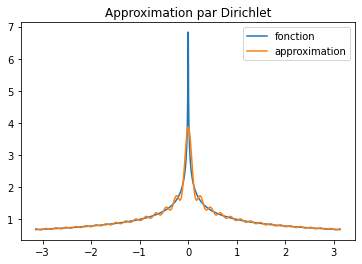

In [ ]:
N = 1000
n=30
alpha = -1/3
x = np.linspace(-np.pi, np.pi, N)
N0 = N-1
x0 = x[0:-1] #les valeurs de x jusqu'à l'avant dernière valeur

f = func_puissance(alpha, x0) 
f3 = np.concatenate((f,f,f))

delta = x0[1]-x0[0] #le pas dans x

#noyau de dirichlet
ker_dir = dirichlet(n,x)/(2*np.pi)*delta

#f est approché par le produit de convolution f3*Dn 
fconv = np.convolve(f3, ker_dir, 'same') 
f_approx_dirichlet = fconv[N0:2*N0] 

#erreur d'approximation
err = np.mean((f_approx_dirichlet-f)**2)
print(f'Erreur d\'approximation par Dirichlet : {err:.4f}')

#tracer la courbe de f et son approximation
p = plt.plot(x0, f, x0, f_approx_dirichlet)
plt.title('Approximation par Dirichlet')
plt.legend((p[0], p[1]), ('fonction', 'approximation'))
plt.show() 

## **Approximation de la fonction  $|x|^\alpha$  par noyaux de Fejer**

Erreur d'approximation par Fejer : 0.0408


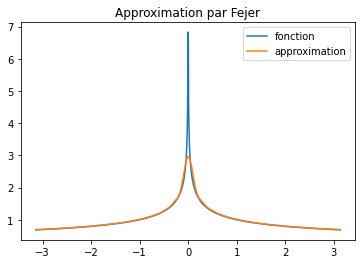

In [ ]:
#noyau de fejer
ker_fejer = fejer(n,x)/(2*np.pi)*delta

#f est approché par le produit de convolution f3*kn
fconv = np.convolve(f3, ker_fejer, 'same')
f_approx_fejer = fconv[N0:2*N0]

#erreur d'approximation
err = np.mean((f_approx_fejer-f)**2)
print(f'Erreur d\'approximation par Fejer : {err:.4f}')

#tracer la courbe de f et son approximation
p = plt.plot(x0, f, x0, f_approx_fejer)
plt.title('Approximation par Fejer')
plt.legend((p[0], p[1]), ('fonction', 'approximation'))
plt.show()

## **Approximation de la fonction  $|x|^\alpha$ par FFT**

On rappelle la formule de la somme de fourier pour une fonction T-périodique: 

$S_n(f)(x)=\sum_{k=-n}^n c_k(f)e^{\frac{2\pi ikx}{T}}$

On veut approcher la fonction $|x|^\alpha$ par $S_n(f)$ en utilisant la transformation de fourier rapide pour calculer les coefficients $c_k(f)$.

In [ ]:
#somme de fourier
def sum_fourier(coef, ind, x, pd) :
  s = np.zeros(x.shape, dtype=np.complex128)
  for k in range(len(ind)) :
    s += coef[k]*np.exp(2*np.pi*1j*ind[k]*x/pd)#1j est le nombre comlexe i
  return s

Ici on utilise le module *numpy.fft* pour appliquer l'algorithme FFT, les instructions de l'algorithme en détail sont disponibles sur Internet.

Erreur d'approximation par FFT : 0.0031


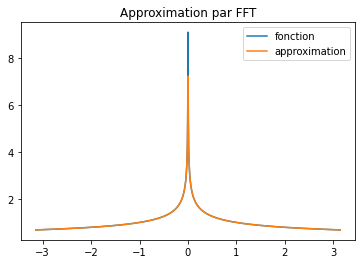

In [ ]:
#avec l'algorithme Fast Fourier Transform (FFT) on calcule N0=N-1 coefs de fourier discrets
coef = np.fft.fft(f)/N0  

if N0%2 == 0:
   ind=range(-(N0//2), N0//2)
else : 
   ind=range(-((N0-1)//2), (N0-1)//2 +1) 

coef = np.fft.fftshift(coef)

x1 = np.linspace(-np.pi, np.pi, int(N*2.36))
f_theo = func_puissance(alpha, x1)

x1_shift = x1 - x1[0] 

f_approx_fft = sum_fourier(coef, ind, x1_shift, 2*np.pi)
f_approx_fft = np.real(f_approx_fft)

err = np.mean((f_approx_fft-f_theo)**2)
print(f'Erreur d\'approximation par FFT : {err:.4f}')

p = plt.plot(x1, f_theo, x1, f_approx_fft)
plt.title('Approximation par FFT')
plt.legend((p[0], p[1]), ('fonction', 'approximation'))
plt.show()

On remarque que la transformation de fourier rapide donne la meilleure approximation pour la fonction $|x|^\alpha$. 

## **Approximation de mouvement brownien par noyaux de Dirichlet et Fejer :**

Erreur d'approximation par Dirichlet : 0.0115


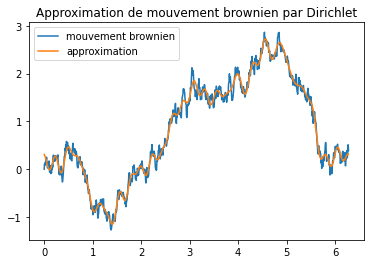

In [ ]:
delta = 2*np.pi/N0

v = np.random.normal(scale=np.sqrt(delta), size=N0)
x=np.linspace(0,np.pi*2,N+1)
x=x[0:-1]

#les valeurs du mouvement brownien
mb = np.concatenate(([0], np.cumsum(v)))  
mb3 = np.concatenate((mb,mb,mb))

#produit de convolution mb3*noyau_de_dirichlet
fconv_mb = np.convolve(mb3, ker_dir, 'same')
f_approx_dirichlet_mb = fconv_mb[N:2*N]

#erreur d'approximation de mb par noyau_de_dirichlet
err = np.mean((f_approx_dirichlet_mb - mb)**2)
print(f'Erreur d\'approximation par Dirichlet : {err:.4f}')

p = plt.plot(x, mb, x, f_approx_dirichlet_mb)
plt.title('Approximation de mouvement brownien par Dirichlet')
plt.legend((p[0], p[1]), ('mouvement brownien', 'approximation'))
plt.show()

Erreur d'approximation par Fejer : 0.0206


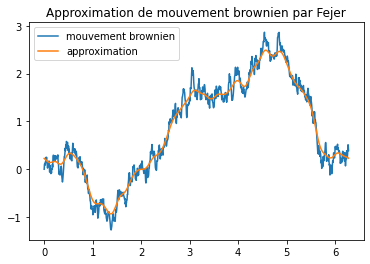

In [ ]:
#produit de convolution mb3*noyau_de_fejer
fconv = np.convolve(mb3, ker_fejer, 'same')
f_approx_fejer_mb = fconv[N:2*N]

#erreur d'approximation
err = np.mean((f_approx_fejer_mb - mb)**2)
print(f'Erreur d\'approximation par Fejer : {err:.4f}')

p = plt.plot(x, mb, x, f_approx_fejer_mb)
plt.title('Approximation de mouvement brownien par Fejer')
plt.legend((p[0], p[1]), ('mouvement brownien', 'approximation'))
plt.show()